<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [88]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 

import warnings
warnings.filterwarnings("ignore")




# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler





# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations


from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

sys.path.append(os.path.abspath("src"))   
import soporte_preprocesamiento as f
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder


In [89]:
df_sinout=pd.read_csv("datos\datos_sin_outliers_iterativo.csv", index_col=0)
df_sinout.reset_index(drop=True, inplace=True)

In [90]:
df_sinout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360401 entries, 0 to 360400
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dateCrawled           360401 non-null  object 
 1   seller                360401 non-null  object 
 2   offerType             360401 non-null  object 
 3   price                 360401 non-null  int64  
 4   abtest                360401 non-null  object 
 5   vehicleType           360401 non-null  object 
 6   yearOfRegistration    360401 non-null  object 
 7   gearbox               360401 non-null  object 
 8   model                 360401 non-null  object 
 9   monthOfRegistration   360401 non-null  object 
 10  fuelType              360401 non-null  object 
 11  brand                 360401 non-null  object 
 12  notRepairedDamage     360401 non-null  object 
 13  lastSeen              360401 non-null  object 
 14  yearCreated           360401 non-null  int64  
 15  

In [91]:
df_sinout.head()

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,...,kilometer_robust,outliers_lof_0.01_20,outliers_lof_0.01_50,outliers_lof_0.05_20,outliers_lof_0.05_50,outliers_lof_0.1_20,outliers_lof_0.1_50,outliers_lof_0.01_8,outliers_lof_0.05_8,outliers_lof_0.1_8
0,2016-03-24 11:52:17,private,offer,480,test,other,moderno,manually,golf,desconocido,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2016-03-24 10:58:45,private,offer,18300,test,coupe,actual,manually,desconocido,5,...,-0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2016-03-14 12:52:21,private,offer,9800,test,suv,moderno,automatic,grand,8,...,-0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2016-03-17 16:54:04,private,offer,1500,test,small car,moderno,manually,golf,6,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2016-03-31 17:25:20,private,offer,3600,test,small car,moderno,manually,fabia,7,...,-1.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
df_sinout["yearCreated"]=df_sinout["yearCreated"].astype("O")
df_sinout["monthCreated"]=df_sinout["monthCreated"].astype("O")

In [93]:
# df_sinout["model"].unique()

In [94]:
# df_sinout["dateCrawled"].unique()

In [95]:
# df_sinout["lastSeen"].unique()

Estas las he eliminado porque sino la visualización no saldría nunca

In [96]:
df_sinout_copy=df_sinout.copy()
df_sinout_copy.drop(columns="model", inplace=True)
df_sinout_copy.drop(columns="dateCrawled", inplace=True)
df_sinout_copy.drop(columns="lastSeen", inplace=True)

Estas siguientes no tiene sentido mantenerlas pues domina una categoría frente a la otra

In [97]:
df_sinout_copy["seller"].value_counts()

seller
private       360398
commercial         3
Name: count, dtype: int64

In [98]:
df_sinout_copy["offerType"].value_counts()

offerType
offer      360395
request         6
Name: count, dtype: int64

In [99]:
df_sinout_copy.drop(columns="seller", inplace=True)
df_sinout_copy.drop(columns="offerType", inplace=True)

In [100]:
df_categoricas= df_sinout_copy.select_dtypes("O")

Tenemos 15 columnas de categóricas

In [101]:
df_categoricas.nunique()

abtest                  2
vehicleType             7
yearOfRegistration      5
gearbox                 3
monthOfRegistration    13
fuelType                7
brand                  40
notRepairedDamage       3
yearCreated             3
monthCreated           10
dtype: int64

In [102]:
df_categoricas.head()

,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated
0,test,other,moderno,manually,desconocido,petrol,volkswagen,desconocido,2016,3
1,test,coupe,actual,manually,5,diesel,audi,yes,2016,3
2,test,suv,moderno,automatic,8,diesel,jeep,desconocido,2016,3
3,test,small car,moderno,manually,6,petrol,volkswagen,no,2016,3
4,test,small car,moderno,manually,7,diesel,skoda,no,2016,3


Vamos a recordar la distribución de la categóricas

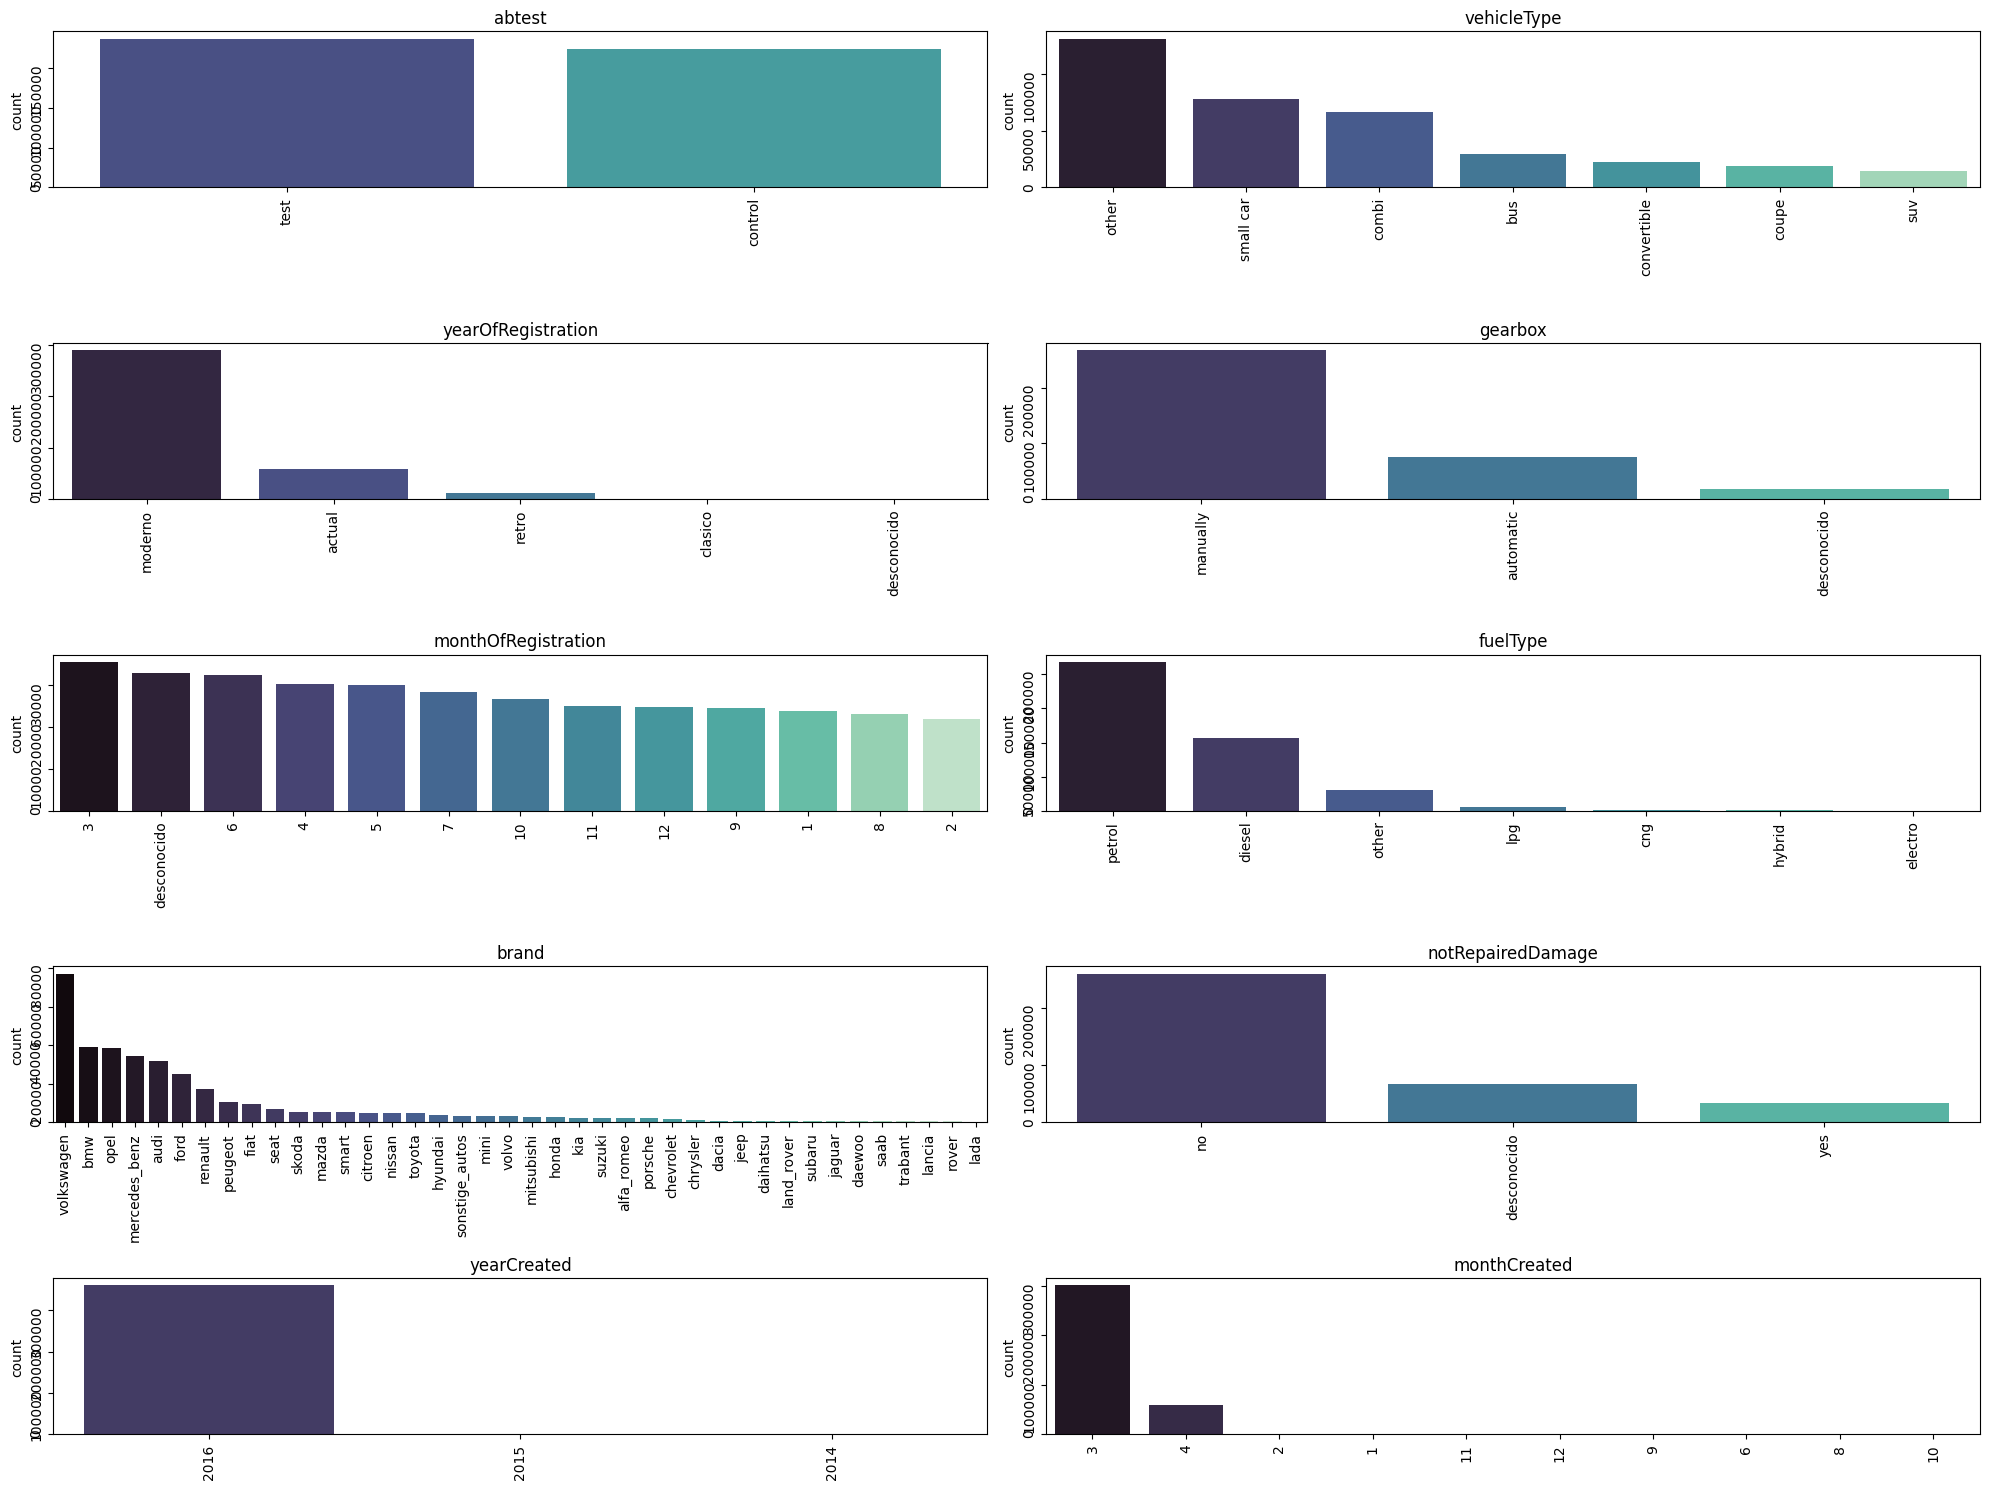

In [16]:
f.plot_categoricas(df_categoricas, (20,15))

Ahora vamos a visualizar la relación entre la dependiente y las categóricas 

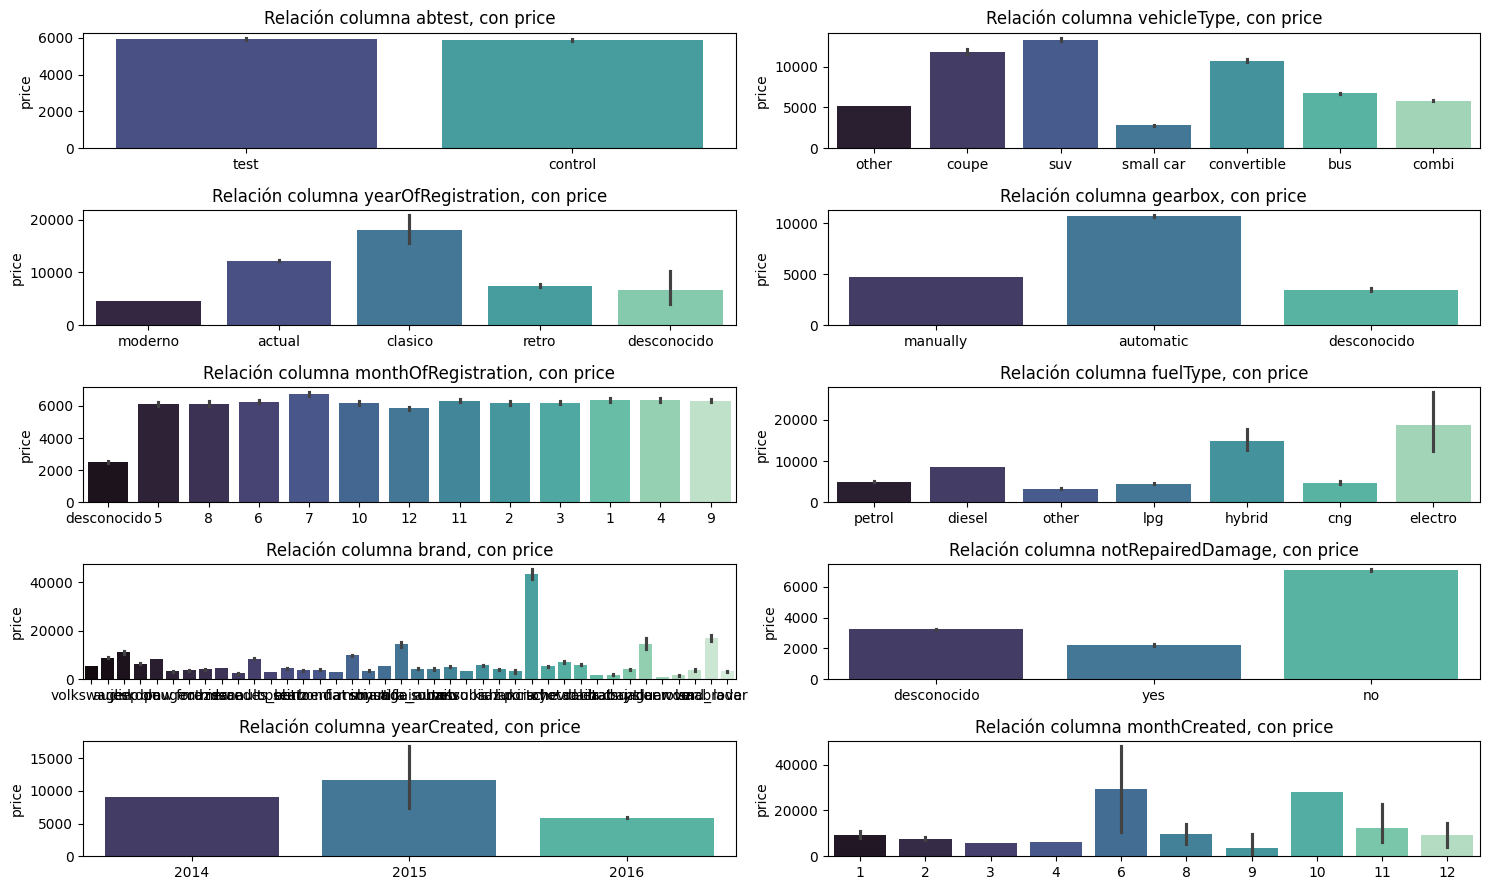

In [17]:
f.visualizar_categoricas(df_sinout_copy, "price", (15,9), "bar")

Ahora debemos comprobar la normalidad y homocedasticidad para saber si son parametricas o no parametricas

Estamos probando primero con kruskal para en aquellas que solo tienen dos categoría comparar con Whitney

In [18]:
df_sinout_copy["yearCreated"]=df_sinout_copy["yearCreated"].astype("category")

In [19]:
import calendar
diccionario_meses = {i : calendar.month_name[i] for i in df_sinout_copy["monthCreated"].unique()}
df_sinout_copy["monthCreated"] =  df_sinout_copy["monthCreated"].map(diccionario_meses)

In [20]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = f.Asunciones(dataframe = df_sinout_copy, columna_numerica= "price")
print("\n-------------\n")
lista_col_categ=df_sinout_copy.select_dtypes(include="O")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = f.TestEstadisticos(df_sinout_copy, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,44.4639,0.1481,-15.7943,104.7222,control-test



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['other', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-897.2905,0.0,-1078.2319,-716.3491,bus-combi
1,4008.7853,0.0,3779.9749,4237.5957,bus-convertible
2,5105.4165,0.0,4862.5518,5348.2813,bus-coupe
3,-1566.9167,0.0,-1733.3501,-1400.4834,bus-other
4,-3930.0530,0.0,-4106.5843,-3753.5218,bus-small car
5,6567.7432,0.0,6305.2833,6830.2031,bus-suv
6,4906.0758,0.0,4706.2034,5105.9481,combi-convertible
7,6002.7071,0.0,5786.8876,6218.5265,combi-coupe
8,-669.6262,0.0,-793.2984,-545.9540,combi-other
9,-3032.7625,0.0,-3169.7225,-2895.8026,combi-small car



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['moderno', 'actual', 'clasico', 'retro', 'desconocido']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,5911.3148,0.0000,4891.3376,6931.2921,actual-clasico
1,-5459.1639,0.0000,-7454.5685,-3463.7593,actual-desconocido
2,-7653.2326,0.0000,-7761.8773,-7544.5880,actual-moderno
3,-4731.9335,0.0000,-4974.0105,-4489.8565,actual-retro
4,-11370.4787,0.0000,-13607.0684,-9133.8891,clasico-desconocido
5,-13564.5475,0.0000,-14580.6661,-12548.4288,clasico-moderno
6,-10643.2483,0.0000,-11682.1395,-9604.3572,clasico-retro
7,-2194.0687,0.0225,-4187.5038,-200.6337,desconocido-moderno
8,727.2304,0.8603,-1277.9082,2732.3690,desconocido-retro
9,2921.2991,0.0000,2696.0329,3146.5654,moderno-retro



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'desconocido']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-7236.0376,0.0,-7410.1134,-7061.9617,automatic-desconocido
1,-5962.9041,0.0,-6048.6590,-5877.1491,automatic-manually
2,1273.1335,0.0,1111.2857,1434.9813,desconocido-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', '5', '8', '6', '7', '10', '12', '11', '2', '3', '1', '4', '9']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-207.1151,0.3443,-476.6562,62.4260,1-10
1,-60.5627,1.0000,-334.6108,213.4853,1-11
2,-524.6627,0.0000,-799.2659,-250.0595,1-12
3,-202.0953,0.4711,-485.5050,81.3145,1-2
4,-183.6353,0.4435,-437.0600,69.7895,1-3
...,...,...,...,...,...
73,-399.8696,0.0000,-663.9992,-135.7400,7-9
74,-4228.3869,0.0000,-4473.7383,-3983.0354,7-desconocido
75,174.1275,0.6784,-103.2060,451.4611,8-9
76,-3654.3897,0.0000,-3913.9023,-3394.8771,8-desconocido



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'other', 'lpg', 'hybrid', 'cng', 'electro']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3820.9858,0.0000,2691.5692,4950.4025,cng-diesel
1,13912.4780,0.0000,11042.7535,16782.2024,cng-electro
2,10129.8358,0.0000,8159.7348,12099.9369,cng-hybrid
3,-327.2424,0.9836,-1512.4426,857.9578,cng-lpg
4,-1467.9125,0.0027,-2604.8102,-331.0148,cng-other
5,242.1159,0.9957,-885.7779,1370.0097,cng-petrol
6,10091.4921,0.0000,7450.8239,12732.1604,diesel-electro
7,6308.8500,0.0000,4690.4841,7927.2159,diesel-hybrid
8,-4148.2282,0.0000,-4525.7325,-3770.7239,diesel-lpg
9,-5288.8983,0.0000,-5463.1006,-5114.6960,diesel-other



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'land_rover', 'lada']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4717.3324,0.0000,4008.4838,5426.1811,alfa_romeo-audi
1,4126.0078,0.0000,3421.4619,4830.5536,alfa_romeo-bmw
2,2852.4008,0.0000,1822.2723,3882.5293,alfa_romeo-chevrolet
3,-129.3725,1.0000,-1242.3597,983.6147,alfa_romeo-chrysler
4,-553.7659,0.8267,-1377.8962,270.3645,alfa_romeo-citroen
...,...,...,...,...,...
775,11.3883,1.0000,-482.0639,504.8404,toyota-volkswagen
776,-105.3942,1.0000,-852.3576,641.5692,toyota-volvo
777,3407.8098,0.0000,1942.8422,4872.7775,trabant-volkswagen
778,3291.0274,0.0000,1722.4008,4859.6540,trabant-volvo



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'yes', 'no']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3855.9833,0.0,3764.1301,3947.8365,desconocido-no
1,-1009.8200,0.0,-1150.4754,-869.1646,desconocido-yes
2,-4865.8033,0.0,-4987.4341,-4744.1725,no-yes



###########################

Estamos analizando la variable MONTHCREATED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthCreated las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['March', 'April', 'February', 'January', 'June', 'November', 'December', 'September', 'August', 'October']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3505.7083,0.9999,-17122.6863,24134.1029,April-August
1,2855.6083,0.9934,-6370.3222,12081.5389,April-December
2,1313.8168,0.1076,-123.2836,2750.9171,April-February
3,3224.7217,0.0746,-145.9864,6595.4298,April-January
4,22930.7083,0.0159,2302.3137,43559.1029,April-June
5,-364.6072,0.0000,-496.5166,-232.6978,April-March
6,6249.2083,0.4968,-2976.7222,15475.1389,April-November
7,21680.7083,0.3558,-7491.9972,50853.4139,April-October
8,-2652.6250,1.0000,-19495.7829,14190.5329,April-September
9,-650.1000,1.0000,-23246.9870,21946.7870,August-December



###########################



Ahora con Mann-Whitney

In [21]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = f.Asunciones(dataframe = df_sinout_copy, columna_numerica= "price")
print("\n-------------\n")
lista_col_categ=df_sinout_copy.select_dtypes(include="O")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = f.TestEstadisticos(df_sinout_copy, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 16217830112.5
Valor p: 0.9281081913452038
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,44.4639,0.1481,-15.7943,104.7222,control-test



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['other', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-897.2905,0.0,-1078.2319,-716.3491,bus-combi
1,4008.7853,0.0,3779.9749,4237.5957,bus-convertible
2,5105.4165,0.0,4862.5518,5348.2813,bus-coupe
3,-1566.9167,0.0,-1733.3501,-1400.4834,bus-other
4,-3930.0530,0.0,-4106.5843,-3753.5218,bus-small car
5,6567.7432,0.0,6305.2833,6830.2031,bus-suv
6,4906.0758,0.0,4706.2034,5105.9481,combi-convertible
7,6002.7071,0.0,5786.8876,6218.5265,combi-coupe
8,-669.6262,0.0,-793.2984,-545.9540,combi-other
9,-3032.7625,0.0,-3169.7225,-2895.8026,combi-small car



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['moderno', 'actual', 'clasico', 'retro', 'desconocido']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,5911.3148,0.0000,4891.3376,6931.2921,actual-clasico
1,-5459.1639,0.0000,-7454.5685,-3463.7593,actual-desconocido
2,-7653.2326,0.0000,-7761.8773,-7544.5880,actual-moderno
3,-4731.9335,0.0000,-4974.0105,-4489.8565,actual-retro
4,-11370.4787,0.0000,-13607.0684,-9133.8891,clasico-desconocido
5,-13564.5475,0.0000,-14580.6661,-12548.4288,clasico-moderno
6,-10643.2483,0.0000,-11682.1395,-9604.3572,clasico-retro
7,-2194.0687,0.0225,-4187.5038,-200.6337,desconocido-moderno
8,727.2304,0.8603,-1277.9082,2732.3690,desconocido-retro
9,2921.2991,0.0000,2696.0329,3146.5654,moderno-retro



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'desconocido']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-7236.0376,0.0,-7410.1134,-7061.9617,automatic-desconocido
1,-5962.9041,0.0,-6048.6590,-5877.1491,automatic-manually
2,1273.1335,0.0,1111.2857,1434.9813,desconocido-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', '5', '8', '6', '7', '10', '12', '11', '2', '3', '1', '4', '9']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-207.1151,0.3443,-476.6562,62.4260,1-10
1,-60.5627,1.0000,-334.6108,213.4853,1-11
2,-524.6627,0.0000,-799.2659,-250.0595,1-12
3,-202.0953,0.4711,-485.5050,81.3145,1-2
4,-183.6353,0.4435,-437.0600,69.7895,1-3
...,...,...,...,...,...
73,-399.8696,0.0000,-663.9992,-135.7400,7-9
74,-4228.3869,0.0000,-4473.7383,-3983.0354,7-desconocido
75,174.1275,0.6784,-103.2060,451.4611,8-9
76,-3654.3897,0.0000,-3913.9023,-3394.8771,8-desconocido



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'other', 'lpg', 'hybrid', 'cng', 'electro']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3820.9858,0.0000,2691.5692,4950.4025,cng-diesel
1,13912.4780,0.0000,11042.7535,16782.2024,cng-electro
2,10129.8358,0.0000,8159.7348,12099.9369,cng-hybrid
3,-327.2424,0.9836,-1512.4426,857.9578,cng-lpg
4,-1467.9125,0.0027,-2604.8102,-331.0148,cng-other
5,242.1159,0.9957,-885.7779,1370.0097,cng-petrol
6,10091.4921,0.0000,7450.8239,12732.1604,diesel-electro
7,6308.8500,0.0000,4690.4841,7927.2159,diesel-hybrid
8,-4148.2282,0.0000,-4525.7325,-3770.7239,diesel-lpg
9,-5288.8983,0.0000,-5463.1006,-5114.6960,diesel-other



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'land_rover', 'lada']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4717.3324,0.0000,4008.4838,5426.1811,alfa_romeo-audi
1,4126.0078,0.0000,3421.4619,4830.5536,alfa_romeo-bmw
2,2852.4008,0.0000,1822.2723,3882.5293,alfa_romeo-chevrolet
3,-129.3725,1.0000,-1242.3597,983.6147,alfa_romeo-chrysler
4,-553.7659,0.8267,-1377.8962,270.3645,alfa_romeo-citroen
...,...,...,...,...,...
775,11.3883,1.0000,-482.0639,504.8404,toyota-volkswagen
776,-105.3942,1.0000,-852.3576,641.5692,toyota-volvo
777,3407.8098,0.0000,1942.8422,4872.7775,trabant-volkswagen
778,3291.0274,0.0000,1722.4008,4859.6540,trabant-volvo



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'yes', 'no']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3855.9833,0.0,3764.1301,3947.8365,desconocido-no
1,-1009.8200,0.0,-1150.4754,-869.1646,desconocido-yes
2,-4865.8033,0.0,-4987.4341,-4744.1725,no-yes



###########################

Estamos analizando la variable MONTHCREATED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthCreated las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['March', 'April', 'February', 'January', 'June', 'November', 'December', 'September', 'August', 'October']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3505.7083,0.9999,-17122.6863,24134.1029,April-August
1,2855.6083,0.9934,-6370.3222,12081.5389,April-December
2,1313.8168,0.1076,-123.2836,2750.9171,April-February
3,3224.7217,0.0746,-145.9864,6595.4298,April-January
4,22930.7083,0.0159,2302.3137,43559.1029,April-June
5,-364.6072,0.0000,-496.5166,-232.6978,April-March
6,6249.2083,0.4968,-2976.7222,15475.1389,April-November
7,21680.7083,0.3558,-7491.9972,50853.4139,April-October
8,-2652.6250,1.0000,-19495.7829,14190.5329,April-September
9,-650.1000,1.0000,-23246.9870,21946.7870,August-December



###########################



Las columnas a comparar entre whitney y kruskal son:  
ABTEST  
- MAN: NO HAY DIFERENCIAS 
- KRUSKAL: NO HAY DIFERENCIAS  
  
Aunque las conclusiones no cambien, es más correcto usar la opción de Mann-Whitney y Kruskal combinadas (2º opción).  



#### FIJANDONOS TANTO EN LAS VISUALIZACIONES COMO EN EL TEST DE TUKEY HEMOS OBTENIDO LAS SIGUIENTES CONCLUSIONES:  

**NO ORDENADAS:**
- ABTEST  
  
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- VEHICLETYPE (todos)
- YEAROFREGISTRATION  (casi casi todos)
- GEARBOX (todos)
- MONTHOFREGISTRATION  (hay)
- FUELTYPE  (casi todos)
- BRAND  (hay)
- NOTREPAIREDDAMAGE  (todos)
- MONTHCRATED  (pocos)

*lo de todos y pocos hace referencia a la cantidad de categorías que son diferentes en esa columna*  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



  

  










**Ahora pasamos al encodin de las que no tienen orden:**

In [103]:
diccionario_encoding = {"onehot": ["abtest"], 
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {
                                    'VisitorType': ['New_Visitor', 'Other', 'Returning_Visitor'],
                                    'OperatingSystems': ['Android','iOS', 'Windows', 'MacOS' , 'Linux', 'ChromeOS' ]
                                    },
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ["vehicleType", "yearOfRegistration", "gearbox", "monthOfRegistration", "fuelType", "brand", "notRepairedDamage", "monthCreated"]
                        }

In [104]:
df_copy_cat=df_sinout_copy.select_dtypes("O")

In [105]:
dfcop=df_sinout_copy.copy()

In [107]:
encoding=f.Encoding(dataframe = df_sinout_copy , diccionario_encoding= diccionario_encoding, variable_respuesta= "price")
df_sinout_copy= encoding.one_hot_encoding()
df_sinout_copy
# df_sinout_copy = pd.concat([df_sinout_copy.reset_index(drop=True), dfcop], axis=1)
# df_sinout_copy.drop(columns="abtest", inplace=True)
# df_sinout_copy.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,...,outliers_lof_0.01_50,outliers_lof_0.05_20,outliers_lof_0.05_50,outliers_lof_0.1_20,outliers_lof_0.1_50,outliers_lof_0.01_8,outliers_lof_0.05_8,outliers_lof_0.1_8,abtest_control,abtest_test
0,480,test,other,moderno,manually,desconocido,petrol,volkswagen,desconocido,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,18300,test,coupe,actual,manually,5,diesel,audi,yes,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,9800,test,suv,moderno,automatic,8,diesel,jeep,desconocido,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1500,test,small car,moderno,manually,6,petrol,volkswagen,no,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,3600,test,small car,moderno,manually,7,diesel,skoda,no,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360396,2200,test,other,moderno,desconocido,1,other,sonstige_autos,desconocido,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
360397,1199,test,convertible,moderno,automatic,3,petrol,smart,no,2016,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,0.0,1.0
360398,9200,test,bus,moderno,manually,3,diesel,volkswagen,no,2016,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
360399,3400,test,combi,moderno,manually,6,diesel,volkswagen,desconocido,2016,...,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,0.0,1.0


In [116]:
df_sinout_copy["monthCreated"].unique()

array([3, 4, 2, 1, 6, 11, 12, 9, 8, 10], dtype=object)

Aqui ya está codificada la de abtest en abtest_test vamos a por el resto

In [109]:
encoder_target= TargetEncoder(cols=["monthCreated", "notRepairedDamage", "brand", "fuelType", "monthOfRegistration", "gearbox", "yearOfRegistration", "vehicleType", "yearCreated", "monthCreated" ])
encoded= encoder_target.fit_transform(df_sinout_copy , df_sinout_copy[["price"]])
encoded.drop(columns="abtest", inplace=True)


In [110]:
encoded.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'yearCreated', 'monthCreated', 'powerCV_robust', 'kilometer_robust',
       'outliers_lof_0.01_20', 'outliers_lof_0.01_50', 'outliers_lof_0.05_20',
       'outliers_lof_0.05_50', 'outliers_lof_0.1_20', 'outliers_lof_0.1_50',
       'outliers_lof_0.01_8', 'outliers_lof_0.05_8', 'outliers_lof_0.1_8',
       'abtest_control', 'abtest_test'],
      dtype='object')

In [112]:
df_final_encoded=encoded[['price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'yearCreated', 'monthCreated', 'powerCV_robust', 'kilometer_robust','abtest_control', 'abtest_test']]

TENGO QUE REVISAR PORQUE ME HA GENERADO NAN EN MONTCREATED

In [113]:
df_final_encoded

,price,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_robust,kilometer_robust,abtest_control,abtest_test
0,480,5159.856113,4564.535429,4727.559085,2494.627126,5002.971271,5323.888161,3235.898669,5916.421491,NaN,0.076874,0.0,0.0,1.0
1,18300,11832.189405,12217.768059,4727.559085,6113.082894,8581.841188,8967.008541,2226.078714,5916.421491,NaN,1.063492,-0.5,0.0,1.0
2,9800,13294.516105,4564.535429,10690.463180,6149.016849,8581.841188,11044.232529,3235.898669,5916.421491,NaN,0.650794,-0.5,0.0,1.0
3,1500,2796.719833,4564.535429,4727.559085,6269.662202,5002.971271,5323.888161,7091.882008,5916.421491,NaN,-0.730159,0.0,0.0,1.0
4,3600,2796.719833,4564.535429,4727.559085,6723.013979,8581.841188,6486.861500,7091.882008,5916.421491,NaN,-0.825397,-1.2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360396,2200,5159.856113,4564.535429,3454.425584,6389.266316,3292.942886,14404.924110,3235.898669,5916.421491,NaN,0.076874,-2.6,0.0,1.0
360397,1199,10735.558123,4564.535429,10690.463180,6205.631045,5002.971271,3582.753962,7091.882008,5916.421491,NaN,-0.317460,-0.5,0.0,1.0
360398,9200,6726.772859,4564.535429,4727.559085,6205.631045,8581.841188,5323.888161,7091.882008,5916.421491,NaN,-0.301587,0.0,0.0,1.0
360399,3400,5829.482345,4564.535429,4727.559085,6269.662202,8581.841188,5323.888161,3235.898669,5916.421491,NaN,-0.333333,0.0,0.0,1.0


In [114]:
df_final_encoded.to_csv("datos\datos_nulos_encoded.csv")